In [136]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import model_from_json

In [56]:

banque_quit = pd.read_csv('data/banque_abandon.csv')
banque_quit.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [57]:
banque_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [58]:
banque_quit.shape

(10000, 14)

In [59]:
banque_quit.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [60]:
##ON drop la colonne de type object "Surname", celle ci ne servira en rien à l'analyse 
banque_quit = banque_quit.drop(columns='Surname')

In [61]:
banque_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [62]:
banque_dummies = pd.get_dummies(data=banque_quit, columns=['Gender', 'Geography'], drop_first=True)
banque_dummies

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


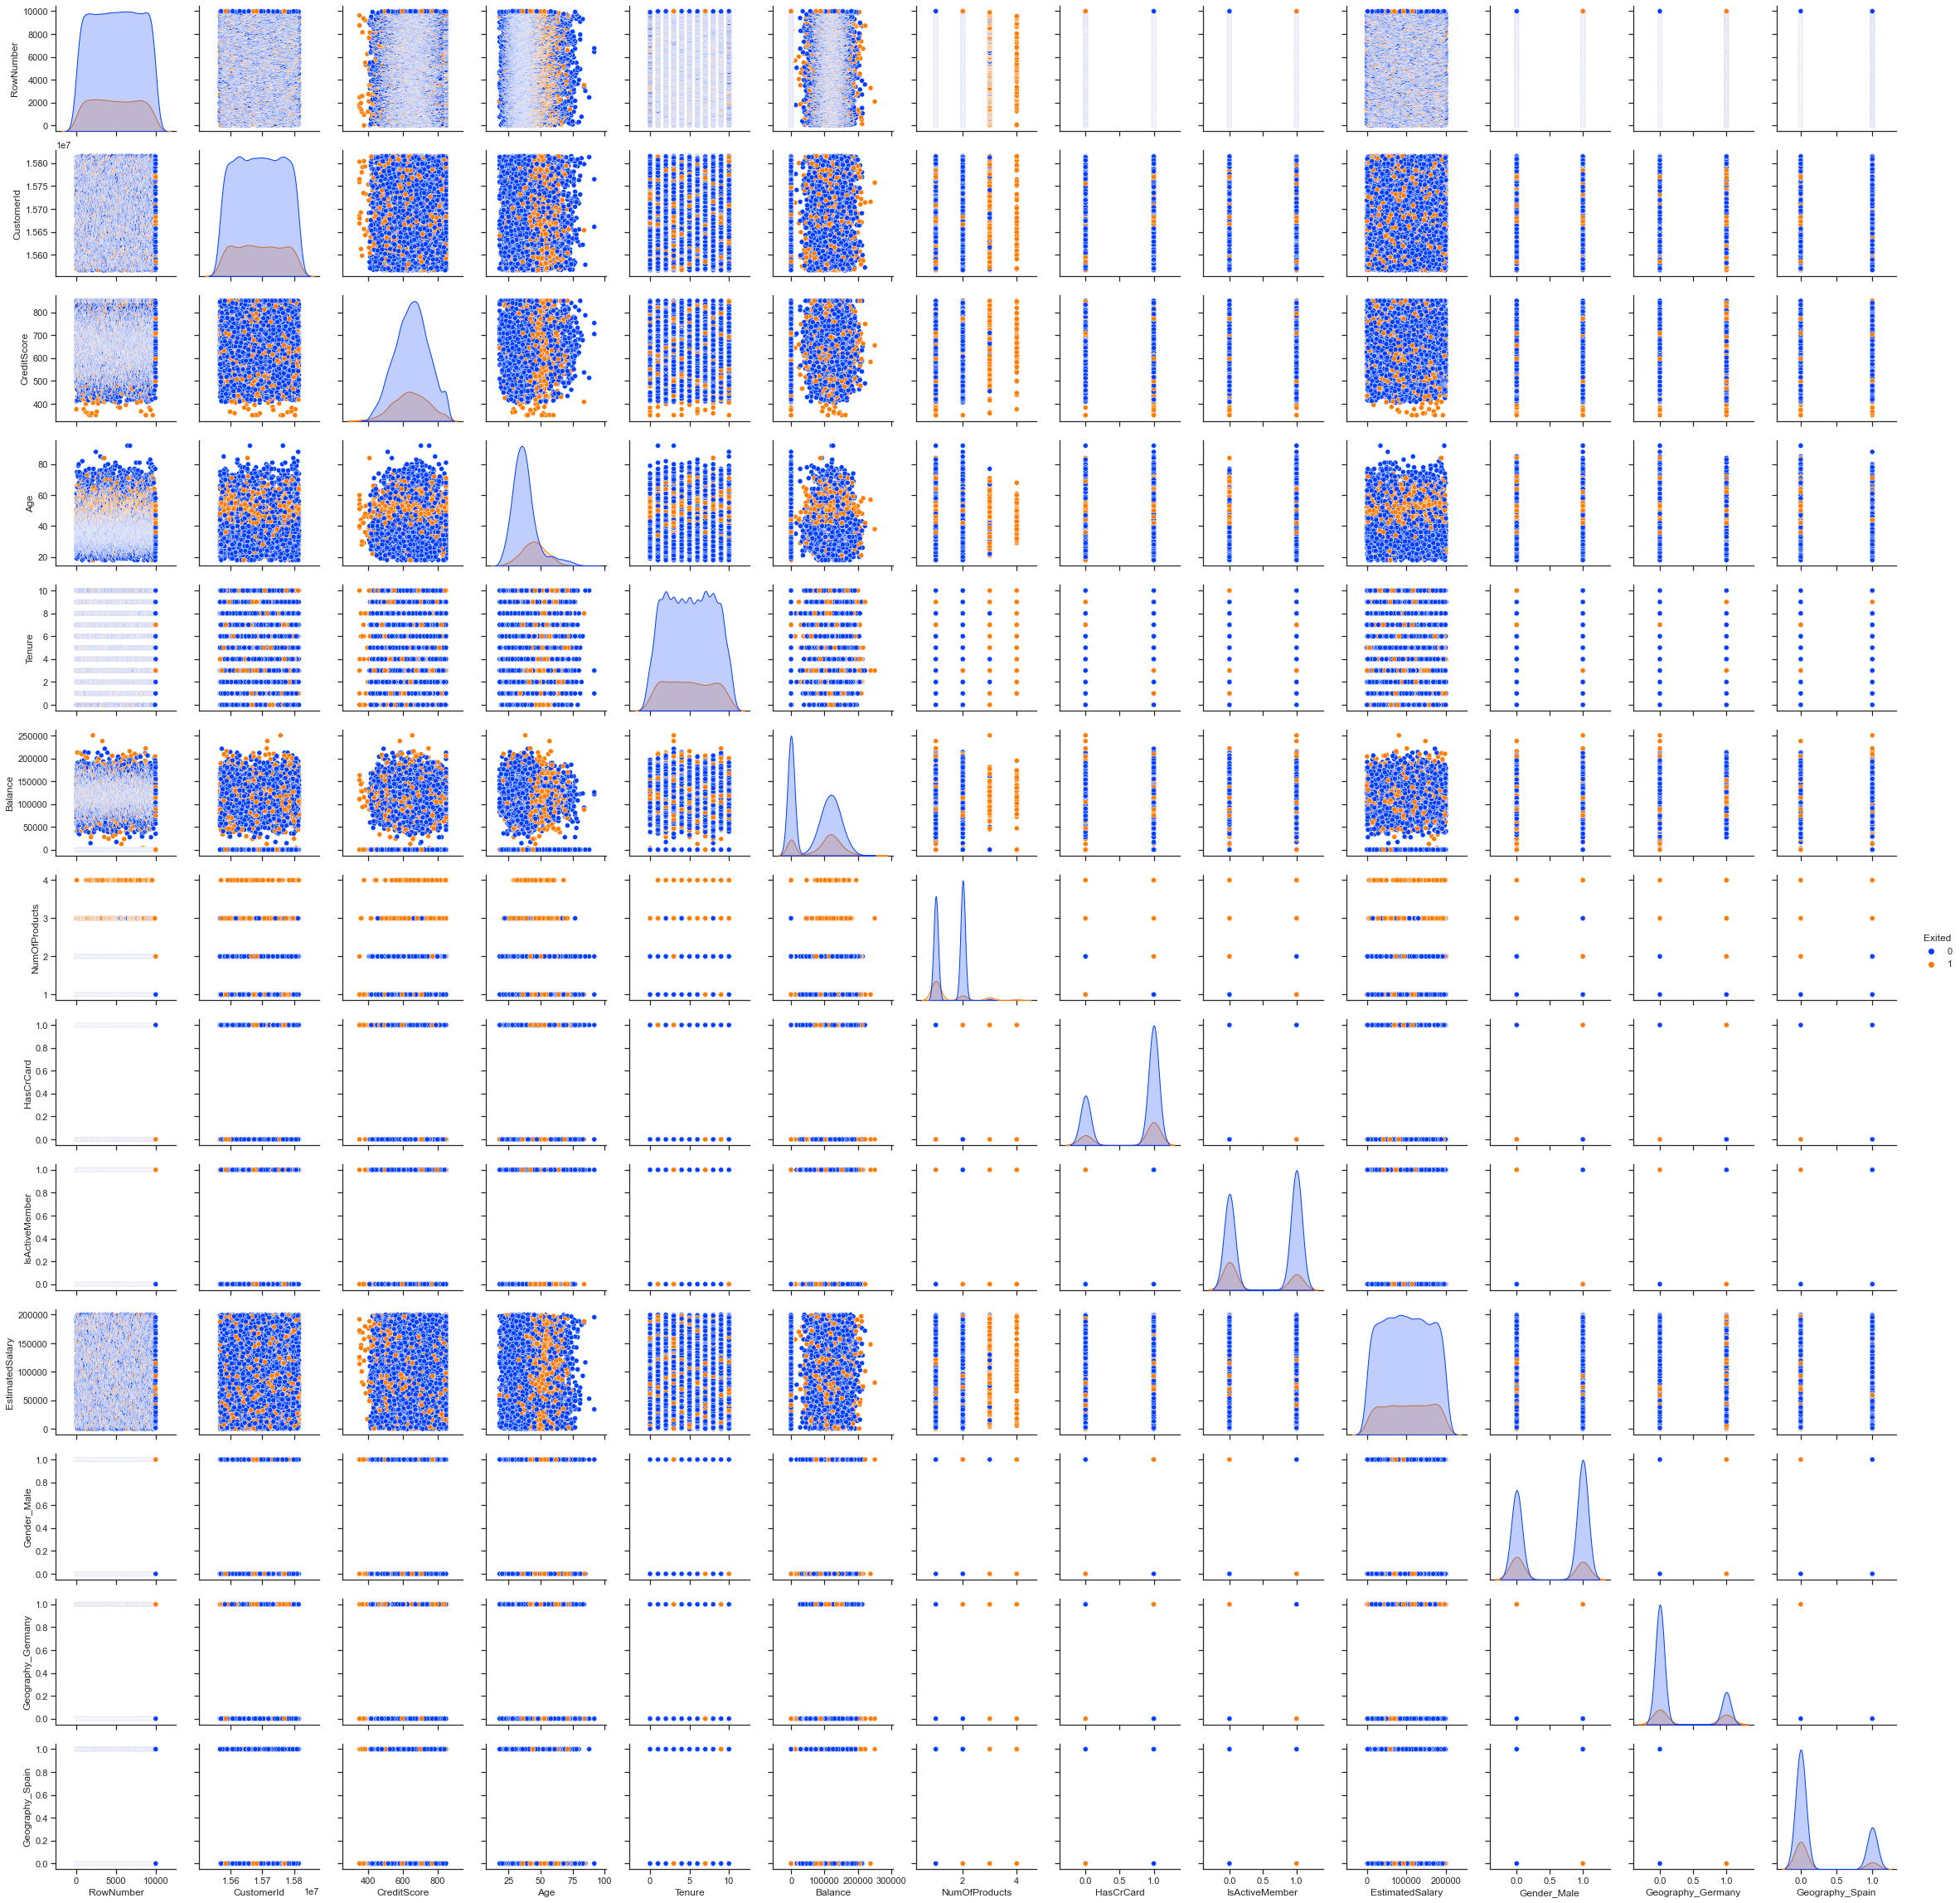

In [70]:
sns.set_theme(style='ticks')
sns.pairplot(banque_dummies, hue='Exited', palette='bright');

In [79]:
from tensorflow.keras.utils import to_categorical

In [80]:
X = banque_dummies.drop(columns='Exited', axis=1)
y = to_categorical(banque_dummies.Exited)


In [82]:
y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

2. Découpage en échantillons train et test (avec 20% d' observations dans le test)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 13), (2000, 13), (8000, 2), (2000, 2))

3. Les réseaux de neurones étant très dépendant des échelles des différentes variables, il faut standardiser les données avec un StandardScaler.  
Vérifier les moyennes et écart-types des variables après transformation. Qu'est-ce que vous devez avoir ?

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
np.mean(X_train, axis=0)

array([ 1.22568622e-16, -1.03348441e-14, -1.83852933e-16,  1.75859327e-16,
        1.11022302e-17, -2.93098879e-16, -1.94511074e-16,  5.81756865e-17,
        5.15143483e-17, -2.61568545e-16,  9.23705556e-17,  6.55031585e-17,
       -7.32747196e-17])

In [87]:
np.std(X_train, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### **2.3 Modélisation et évaluation**

1. Construire et entraîner un perceptron simple adapté au problème

In [96]:
from keras.models import Sequential
from keras.layers import Dense

# structure du réseau
model1 = Sequential()
model1.add(Dense(units=2, input_dim=13, activation='softmax'))

# paramètes d'apprentissage
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# entrainement
model1.fit(X_train, y_train, epochs=120, batch_size=15, validation_data=(X_test, y_test))

Epoch 1/120
534/534 [==============================] - 0s 371us/step - loss: 0.5991 - accuracy: 0.7145 - val_loss: 0.4501 - val_accuracy: 0.7995
Epoch 2/120
534/534 [==============================] - 0s 280us/step - loss: 0.4345 - accuracy: 0.8081 - val_loss: 0.4366 - val_accuracy: 0.7990
Epoch 3/120
534/534 [==============================] - 0s 282us/step - loss: 0.4282 - accuracy: 0.8129 - val_loss: 0.4358 - val_accuracy: 0.7975
Epoch 4/120
534/534 [==============================] - 0s 289us/step - loss: 0.4276 - accuracy: 0.8131 - val_loss: 0.4360 - val_accuracy: 0.8000
Epoch 5/120
534/534 [==============================] - 0s 292us/step - loss: 0.4274 - accuracy: 0.8115 - val_loss: 0.4359 - val_accuracy: 0.7995
Epoch 6/120
534/534 [==============================] - 0s 291us/step - loss: 0.4274 - accuracy: 0.8127 - val_loss: 0.4352 - val_accuracy: 0.7995
Epoch 7/120
534/534 [==============================] - 0s 284us/step - loss: 0.4274 - accuracy: 0.8134 - val_loss: 0.4356 - val_ac

In [97]:
model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 254us/step - loss: 0.4356 - accuracy: 0.7985


[0.4355849623680115, 0.7985000014305115]

In [98]:
model1.predict(X_test)

array([[0.5925131 , 0.40748692],
       [0.94201195, 0.05798809],
       [0.9463978 , 0.05360221],
       ...,
       [0.78534234, 0.2146577 ],
       [0.3245069 , 0.67549306],
       [0.8416589 , 0.15834114]], dtype=float32)

In [99]:
np.argmax(model1.predict(X_test), axis=1)

array([0, 0, 0, ..., 0, 1, 0])

In [101]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(np.argmax(y_test, axis=1), np.argmax(model1.predict(X_test), axis=1)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1593
           1       0.51      0.18      0.27       407

    accuracy                           0.80      2000
   macro avg       0.67      0.57      0.57      2000
weighted avg       0.76      0.80      0.76      2000



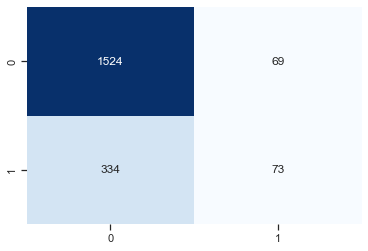

In [102]:
sns.heatmap(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model1.predict(X_test), axis=1)),
            annot=True, cbar=False, cmap='Blues', fmt='d');

3. Essayer d'améliorer votre modèle en ajoutant une couche cachée. Quel problème se pose lorsqu'on ajoute trop de couches ?

In [141]:
# structure du réseau
model2 = Sequential()
model2.add(Dense(units=8, input_dim=13, activation='relu'))
model2.add(Dense(units=2, activation='softmax'))

# paramètes d'apprentissage
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# entrainement
model2.fit(X_train, y_train, epochs=120, batch_size=15, validation_data=(X_test, y_test))

# évaluation
model2.evaluate(X_test,y_test)

Epoch 1/120
534/534 [==============================] - 0s 418us/step - loss: 0.6019 - accuracy: 0.7154 - val_loss: 0.4710 - val_accuracy: 0.7975
Epoch 2/120
534/534 [==============================] - 0s 315us/step - loss: 0.4384 - accuracy: 0.8126 - val_loss: 0.4297 - val_accuracy: 0.8100
Epoch 3/120
534/534 [==============================] - 0s 340us/step - loss: 0.4120 - accuracy: 0.8223 - val_loss: 0.4116 - val_accuracy: 0.8210
Epoch 4/120
534/534 [==============================] - 0s 321us/step - loss: 0.3921 - accuracy: 0.8369 - val_loss: 0.3920 - val_accuracy: 0.8335
Epoch 5/120
534/534 [==============================] - 0s 319us/step - loss: 0.3752 - accuracy: 0.8445 - val_loss: 0.3783 - val_accuracy: 0.8405
Epoch 6/120
534/534 [==============================] - 0s 327us/step - loss: 0.3634 - accuracy: 0.8510 - val_loss: 0.3708 - val_accuracy: 0.8475
Epoch 7/120
534/534 [==============================] - 0s 323us/step - loss: 0.3560 - accuracy: 0.8559 - val_loss: 0.3659 - val_ac

[0.3455567955970764, 0.8565000295639038]

In [105]:
model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 233us/step - loss: 0.3491 - accuracy: 0.8610


[0.34910303354263306, 0.8610000014305115]

In [122]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [146]:
def build_classifier():
    # Initialising the ANN
    classifier = Sequential()
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 13))

    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 5, epochs = 120)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 2, n_jobs=-1)
mean = accuracies.mean()
variance = accuracies.std()

2022-01-27 09:25:42.667873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-27 09:25:42.667875: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-27 09:25:42.668048: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-27 09:25:42.668051: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/120
Epoch 1/120
800/800 [==============================] - 0s 277us/step - loss: 0.5937 - accuracy: 0.7912
Epoch 2/120
800/800 [==============================] - 0s 282us/step - loss: 0.5886 - accuracy: 0.8000
Epoch 2/120
800/800 [==============================] - 0s 271us/step - loss: 0.5240 - accuracy: 0.7912
Epoch 3/120
800/800 [==============================] - 0s 279us/step - loss: 0.5154 - accuracy: 0.8012
Epoch 3/120
800/800 [==============================] - 0s 262us/step - loss: 0.5135 - accuracy: 0.7912
Epoch 4/120
800/800 [==============================] - 0s 270us/step - loss: 0.5018 - accuracy: 0.8012
Epoch 4/120
800/800 [==============================] - 0s 418us/step - loss: 0.5123 - accuracy: 0.7912
Epoch 5/120
800/800 [==============================] - 0s 428us/step - loss: 0.4993 - accuracy: 0.8012
Epoch 5/120
800/800 [==============================] - 0s 263us/step - loss: 0.5120 - accuracy: 0.7912
Epoch 6/120
800/800 [==============================] - 0s 270

In [144]:
model2.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_97 (Dense)             (None, 2)                 18        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [139]:
# serialize model to JSON
model_json = model2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
